In [1]:
# important for data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# for imbalancing
from imblearn.over_sampling import SMOTE

# for spliting and training and testing
from sklearn.model_selection import train_test_split

# for model selection
from sklearn.tree import DecisionTreeClassifier

# for cheacking cross validating
from sklearn.model_selection import cross_val_score

In [2]:
# load the data from system
df=pd.read_csv(r"E:\Feature engineering\parkinsons.data")
df

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [3]:
# checking the nan values and data type of every columns
display(df.info())
display(df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

None

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [4]:
display(df.columns)
df=df.drop('name',axis=1)
df

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


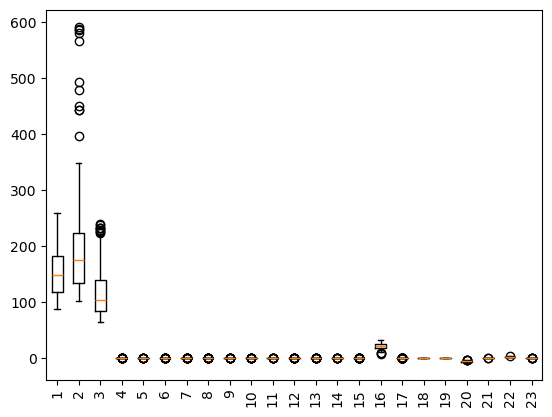

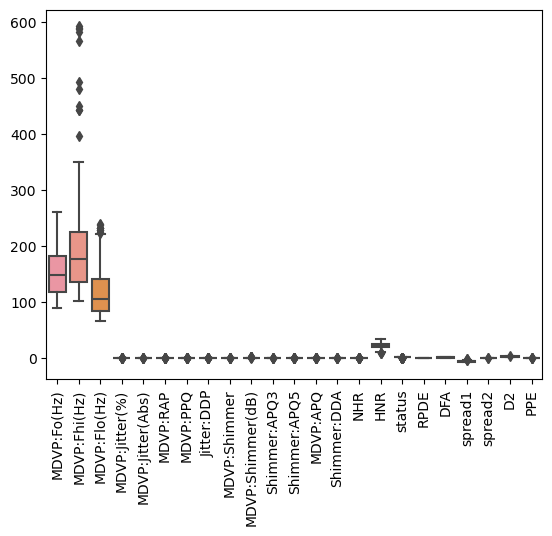

MDVP:Fo(Hz)
skewed ==>  1.0


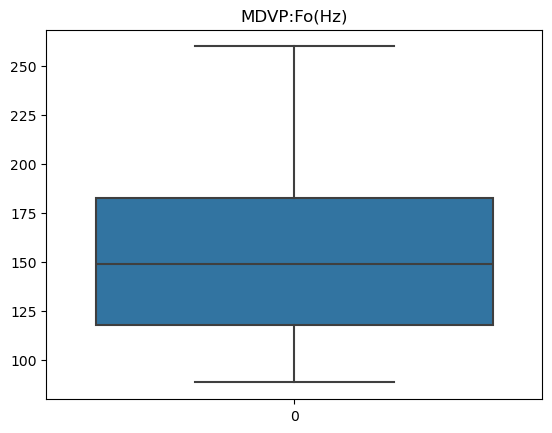

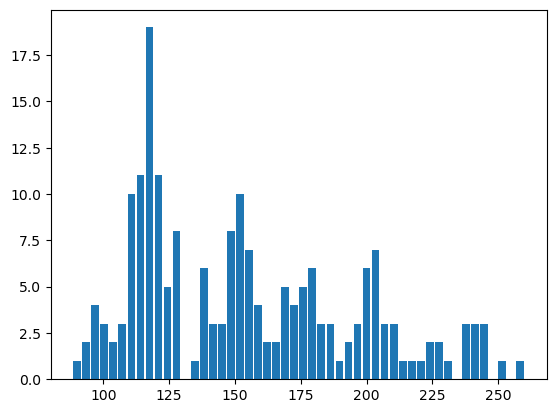

*****************************************************************************
MDVP:Fhi(Hz)
skewed ==>  3.0


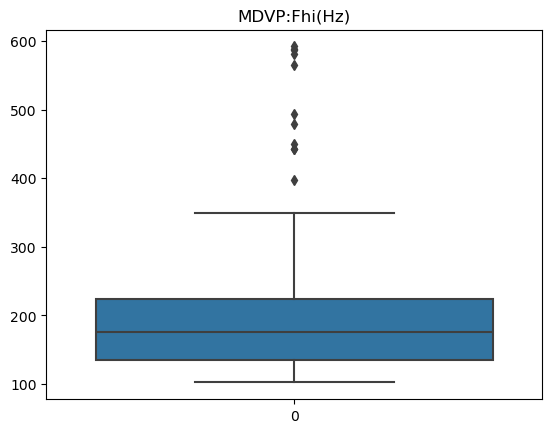

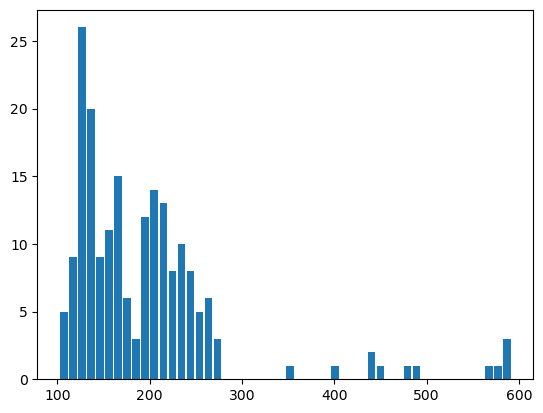

*****************************************************************************
MDVP:Flo(Hz)
skewed ==>  1.0


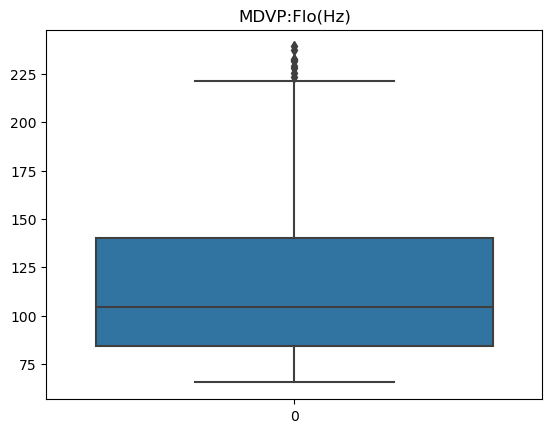

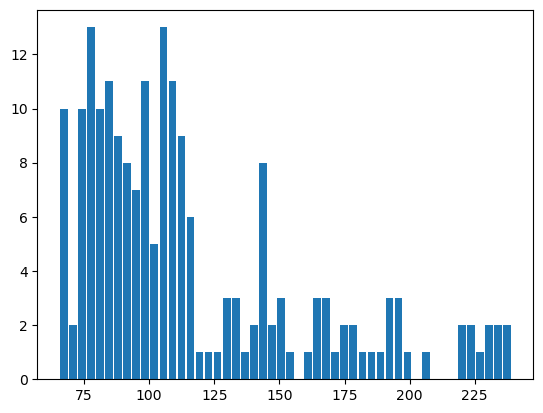

*****************************************************************************
MDVP:Jitter(%)
skewed ==>  3.0


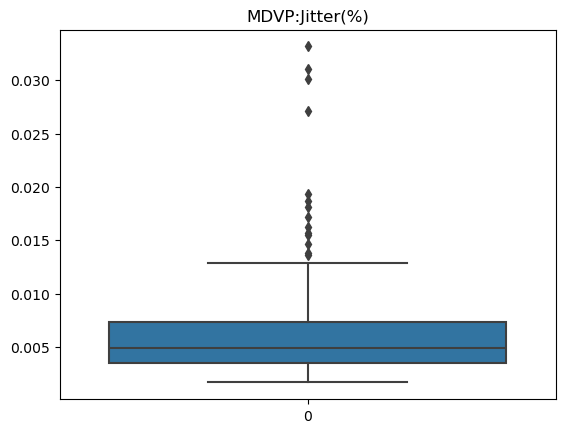

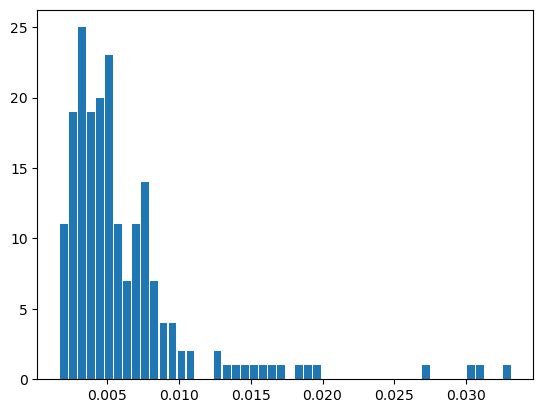

*****************************************************************************
MDVP:Jitter(Abs)
skewed ==>  3.0


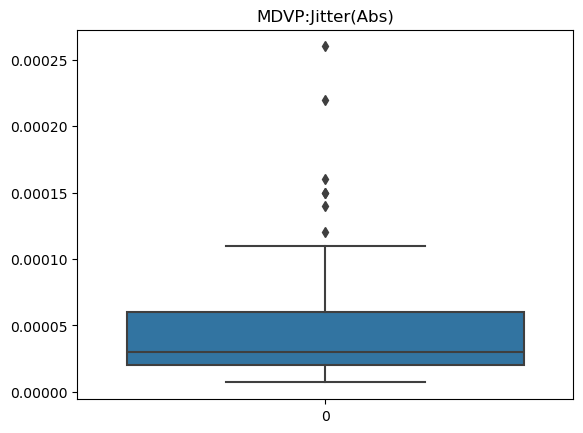

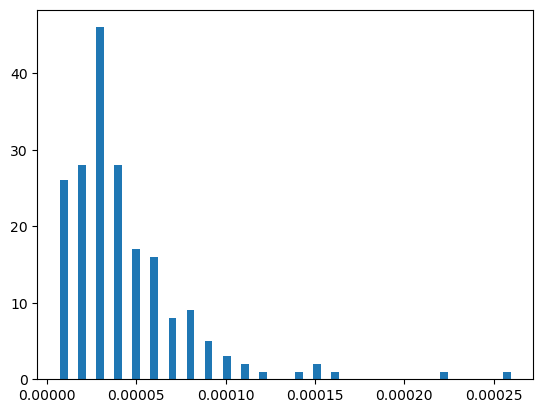

*****************************************************************************
MDVP:RAP
skewed ==>  3.0


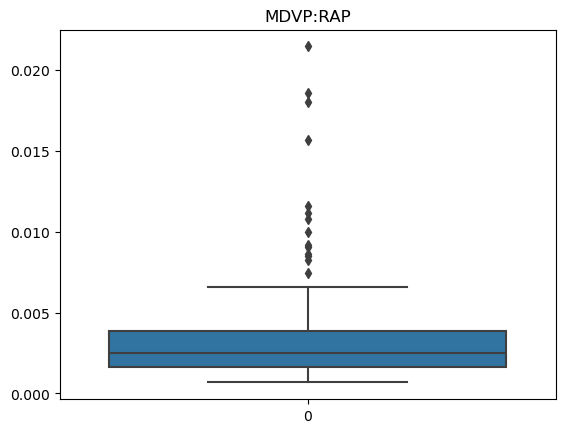

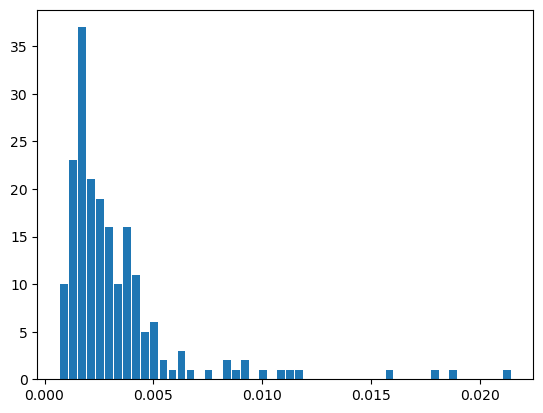

*****************************************************************************
MDVP:PPQ
skewed ==>  3.0


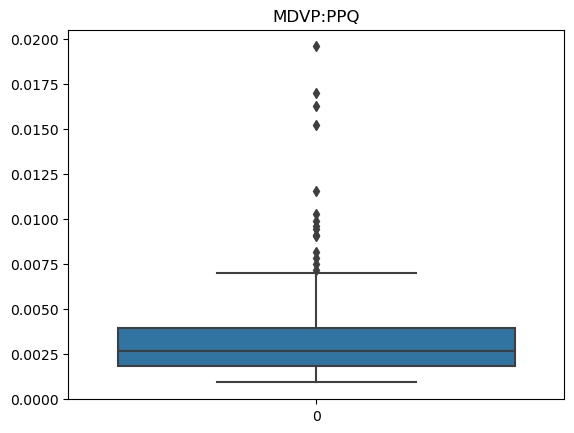

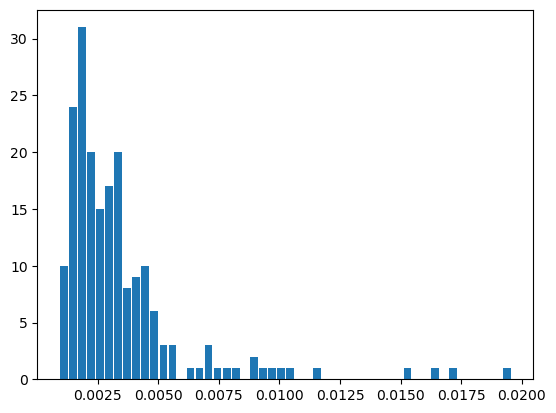

*****************************************************************************
Jitter:DDP
skewed ==>  3.0


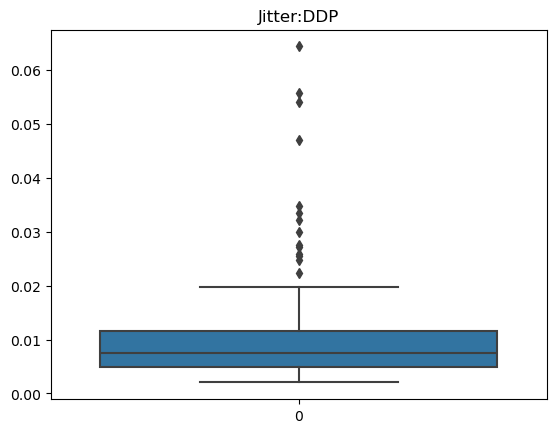

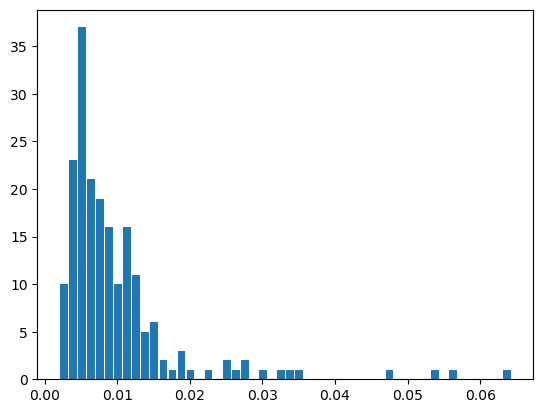

*****************************************************************************
MDVP:Shimmer
skewed ==>  2.0


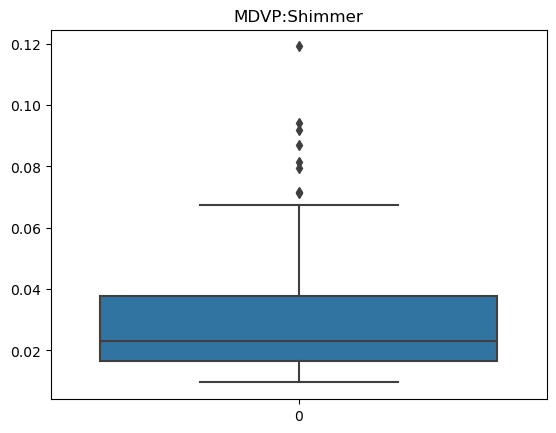

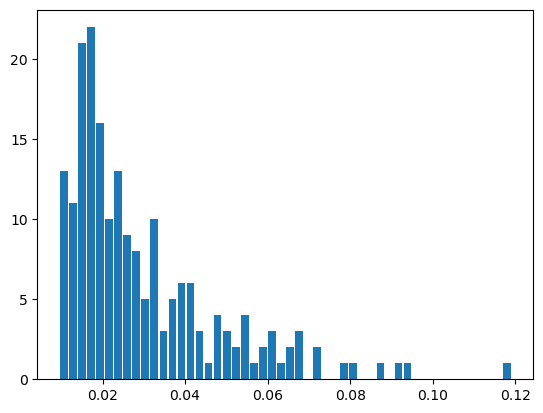

*****************************************************************************
MDVP:Shimmer(dB)
skewed ==>  2.0


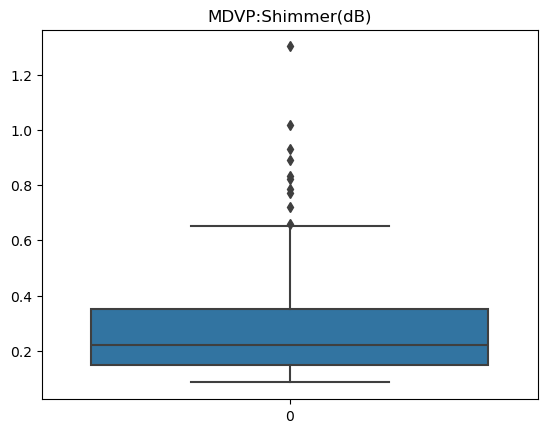

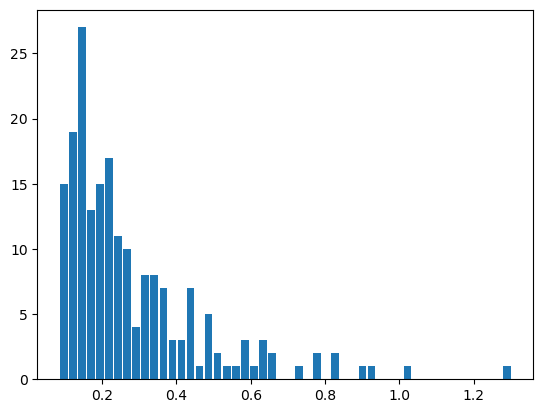

*****************************************************************************
Shimmer:APQ3
skewed ==>  2.0


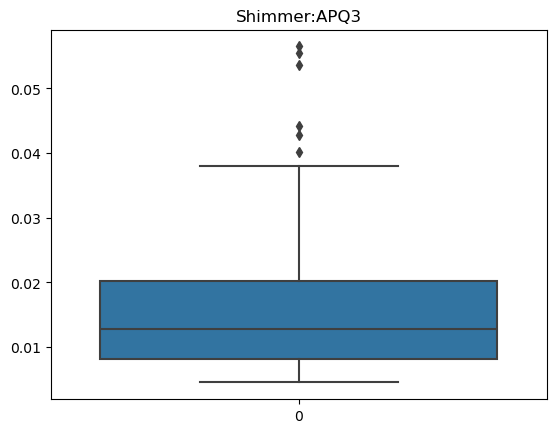

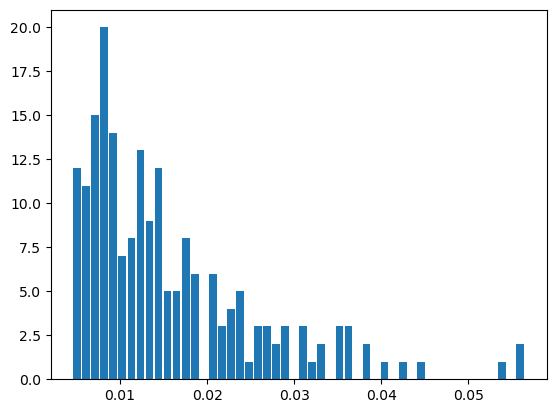

*****************************************************************************
Shimmer:APQ5
skewed ==>  2.0


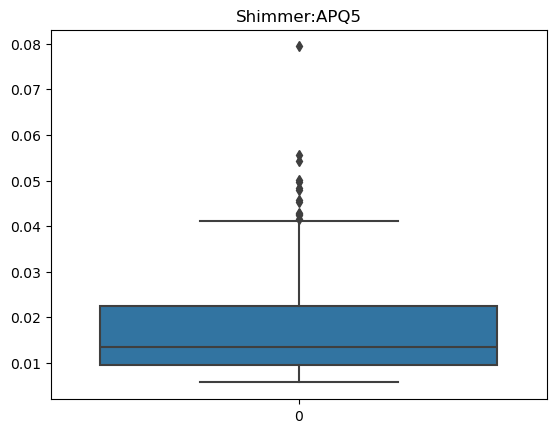

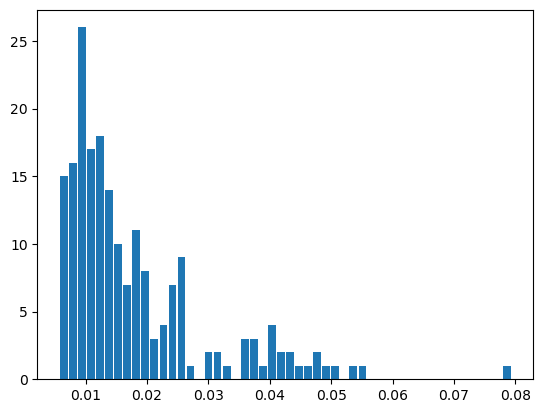

*****************************************************************************
MDVP:APQ
skewed ==>  3.0


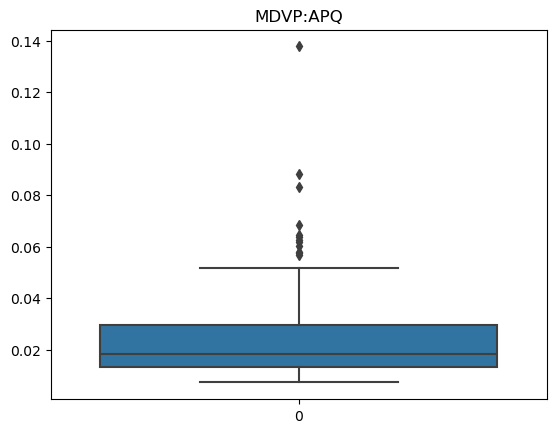

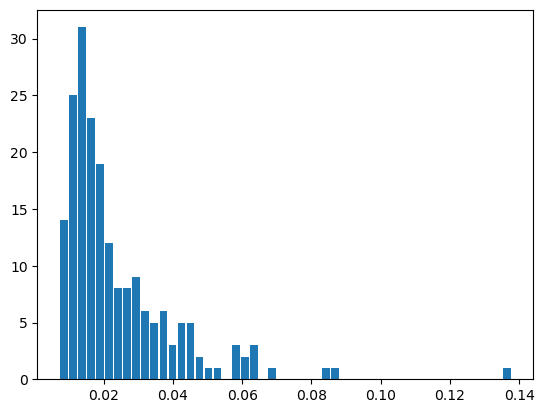

*****************************************************************************
Shimmer:DDA
skewed ==>  2.0


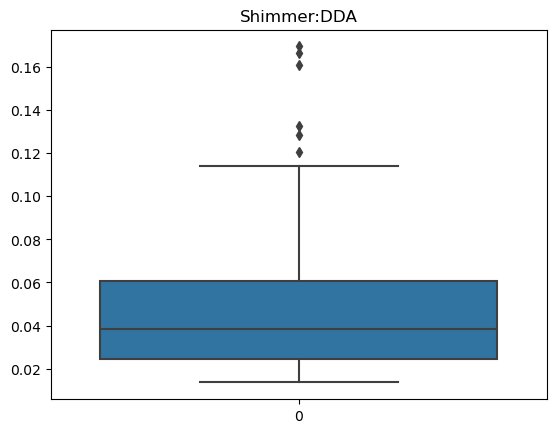

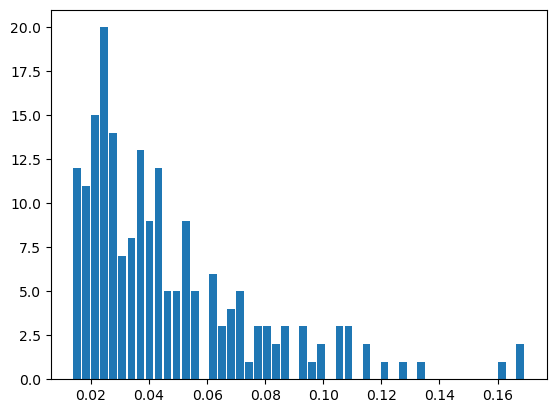

*****************************************************************************
NHR
skewed ==>  4.0


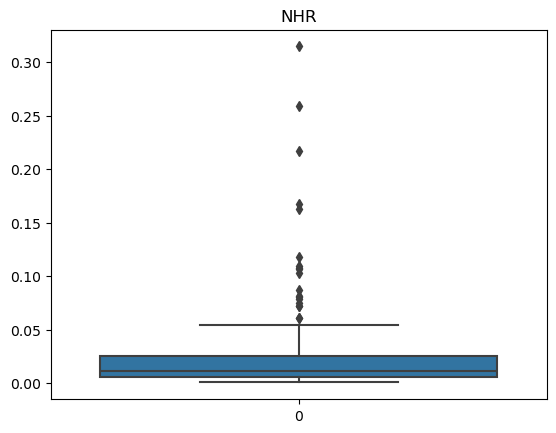

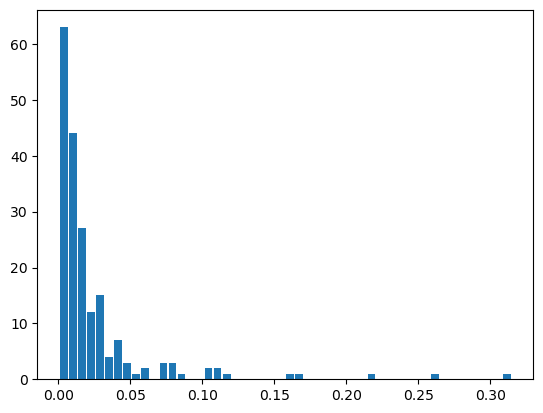

*****************************************************************************
HNR
skewed ==>  -1.0


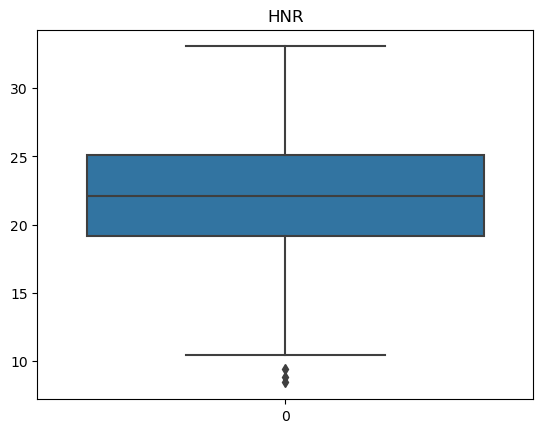

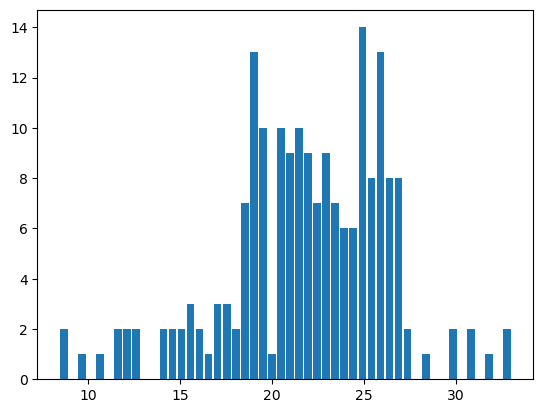

*****************************************************************************
status
skewed ==>  -1.0


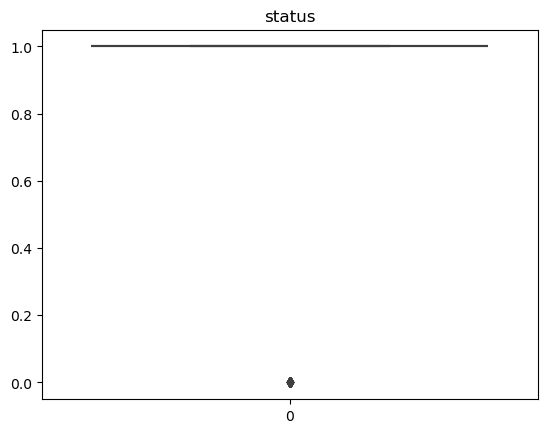

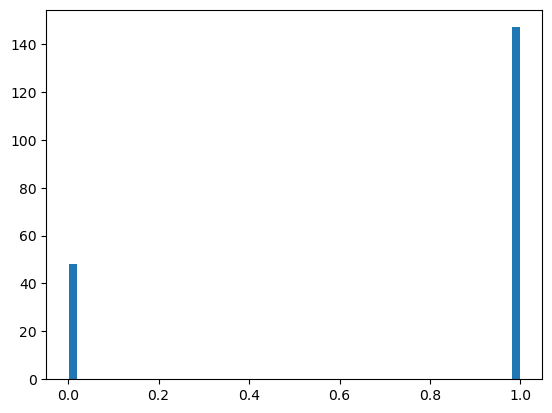

*****************************************************************************
RPDE
skewed ==>  -0.0


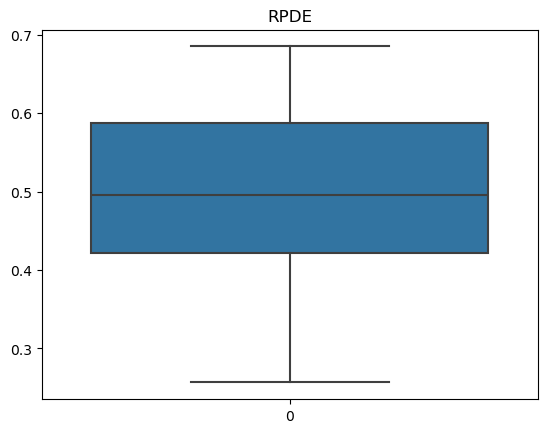

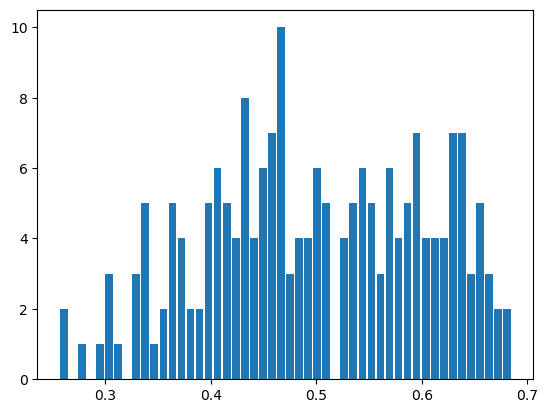

*****************************************************************************
DFA
skewed ==>  -0.0


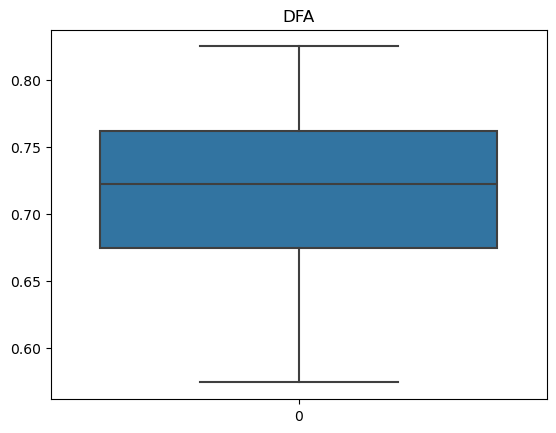

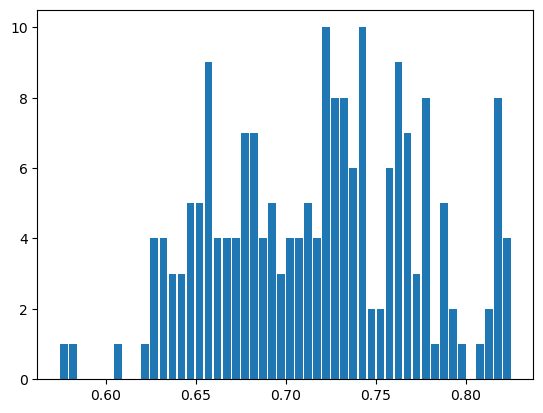

*****************************************************************************
spread1
skewed ==>  0.0


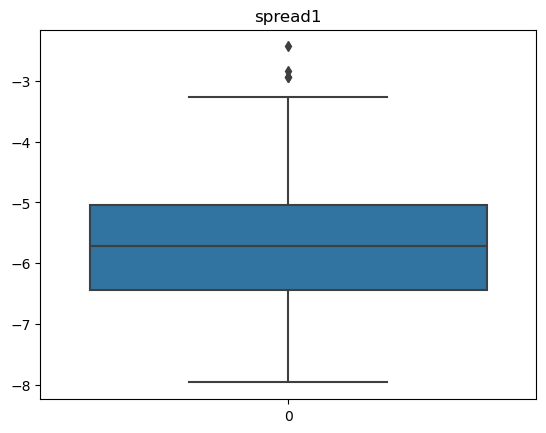

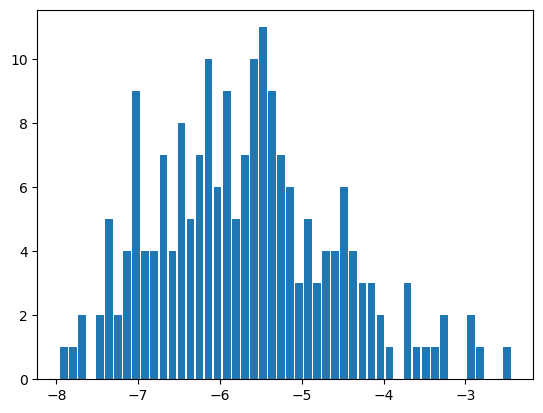

*****************************************************************************
spread2
skewed ==>  0.0


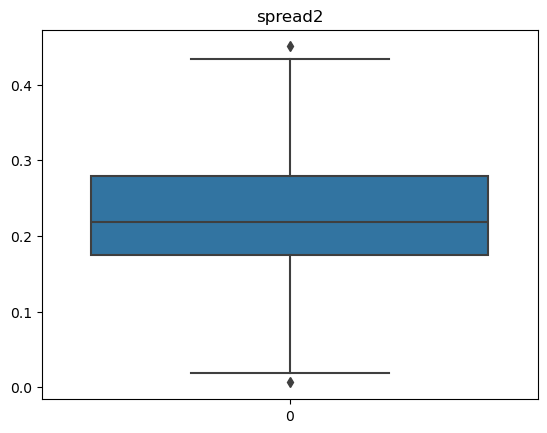

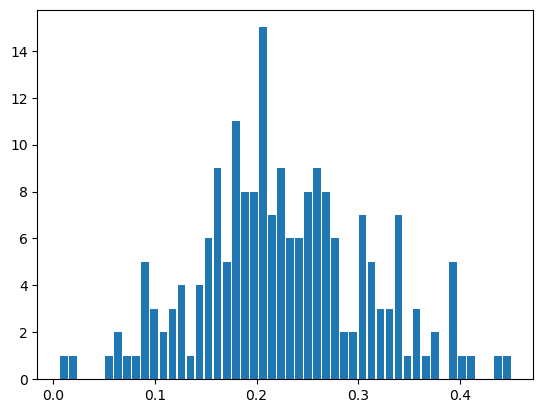

*****************************************************************************
D2
skewed ==>  0.0


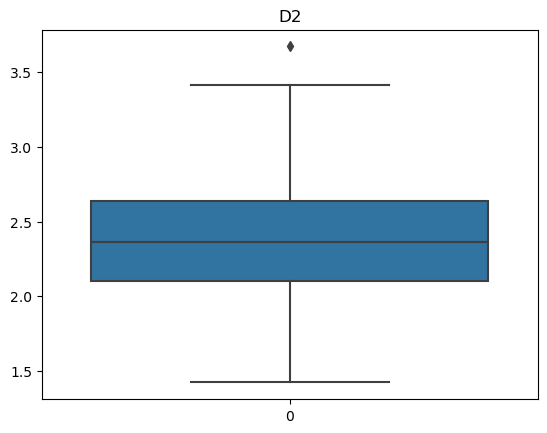

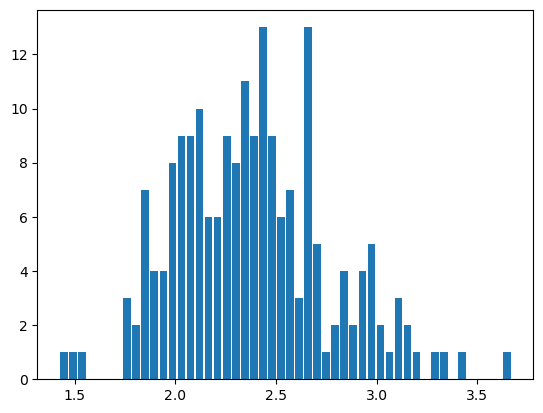

*****************************************************************************
PPE
skewed ==>  1.0


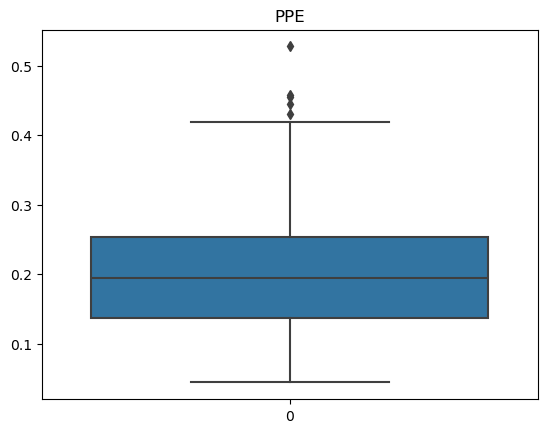

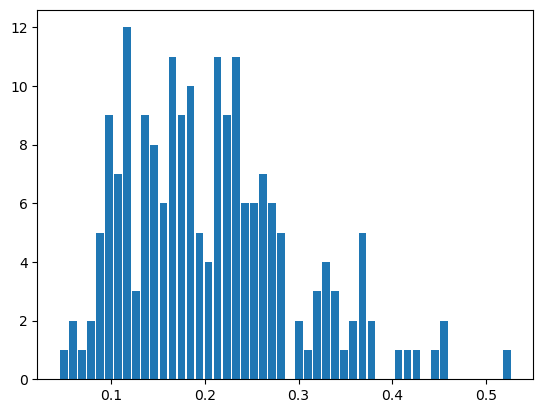

*****************************************************************************


In [5]:
# checking the errors
plt.boxplot(df)
plt.xticks(rotation=90)
plt.show()
sns.boxplot(df)
plt.xticks(rotation=90)
plt.show()
for i in df.columns:
    print(i)
    sk=df[i].skew().round()
    print('skewed ==> ',df[i].skew().round())
    plt.title(i)
    sns.boxplot(df[i])
    plt.show()
    plt.hist(df[i],bins=50,rwidth=0.85)
    plt.show()
    
    print("*****************************************************************************")

 Error detection and error removing Is DONE


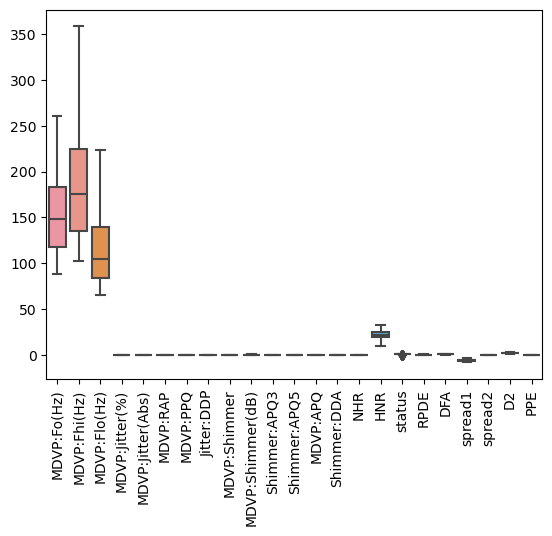

In [6]:
# Removing errors from showing error in the columns
col=[ 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE']
for i in col: 
    if sk==0 or sk==-0:
        df[i].describe
        m=df[i].mean()
        s=df[i].std()
        ll=m-3*s
        ul=m+3*s
        df[i]=df[i].map(lambda x: ll if x<ll else ul if x>ul else x)
    else:
        q1=df[i].quantile(0.25)
        q3=df[i].quantile(0.75)
        iqr=q3-q1
        ll=q1-1.5*iqr
        ul=q3+1.5*iqr
        df[i]=df[i].map(lambda x: ll if x<ll else ul if x>ul else x)
        
print(" Error detection and error removing Is DONE")
df
sns.boxplot(df)
plt.xticks(rotation=90)
plt.show()

In [10]:
# data separation
x=df.drop('status',axis=1)
y=df['status']
display(x,y)


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.007840,0.00007,0.00370,0.005540,0.01109,0.04374,0.426,...,0.02971,0.06545,0.022110,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.009680,0.00008,0.00465,0.006960,0.01394,0.06134,0.626,...,0.04368,0.09403,0.019290,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.010500,0.00009,0.00544,0.007098,0.01633,0.05233,0.482,...,0.03590,0.08270,0.013090,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.009970,0.00009,0.00502,0.006980,0.01505,0.05492,0.517,...,0.03772,0.08771,0.013530,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.012840,0.00011,0.00655,0.007098,0.01966,0.06425,0.584,...,0.04465,0.10470,0.017670,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.004590,0.00003,0.00263,0.002590,0.00790,0.04087,0.405,...,0.02745,0.07008,0.027640,19.517,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,209.516,253.017,89.488,0.005640,0.00003,0.00331,0.002920,0.00994,0.02751,0.263,...,0.01879,0.04812,0.018100,19.147,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,174.688,240.005,74.287,0.013222,0.00008,0.00624,0.005640,0.01873,0.02308,0.256,...,0.01667,0.03804,0.055212,17.883,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,198.764,358.220,74.904,0.007400,0.00004,0.00370,0.003900,0.01109,0.02296,0.241,...,0.01588,0.03794,0.055212,19.020,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64

status
1    147
0     48
Name: count, dtype: int64

Axes(0.125,0.11;0.775x0.77)


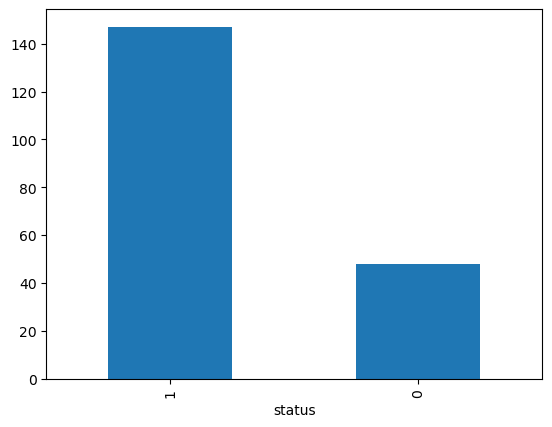

In [18]:
# checking imbalancing for the dependent columns
display(df['status'].value_counts())
print(df['status'].value_counts().plot(kind='bar'))


(294, 22)

(294,)

status
1    147
0    147
Name: count, dtype: int64

Axes(0.125,0.11;0.775x0.77)


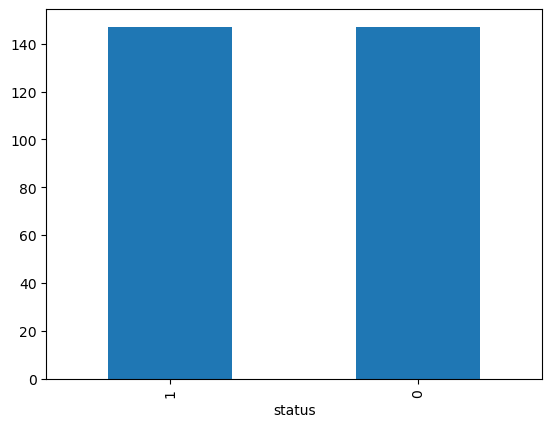

In [19]:
# there is the imbalancing then we have removing the imbalncing by using over sampling
from imblearn.over_sampling import SMOTE
smt=SMOTE()
smt

xsmt,ysmt=smt.fit_resample(x,y)
display(xsmt.shape,ysmt.shape)

display(ysmt.value_counts())
print(ysmt.value_counts().plot(kind='bar'))

In [22]:
# data training,testing and spliting
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(xsmt,ysmt,test_size=0.25, random_state=5)
display("Training data shape ",xtrain.shape,ytrain.shape)
display("Testing data shape ",xtest.shape,ytest.shape)

'Training data shape '

(220, 22)

(220,)

'Testing data shape '

(74, 22)

(74,)

In [28]:
# model selection
from sklearn.tree import DecisionTreeClassifier
dtc= DecisionTreeClassifier()
dtc

# model training
dtc.fit(xtrain,ytrain)

display('score ==>',dtc.score(xtest,ytest))

'score ==>'

0.9459459459459459

In [32]:
# cross validating of score
from sklearn.model_selection import cross_val_score
dtc1= DecisionTreeClassifier(criterion='entropy')
display(dtc1)

sc= cross_val_score(dtc1,xsmt,ysmt,cv=20,n_jobs=-1)
display(sc)

display(sc.mean())

DecisionTreeClassifier(criterion='entropy')

array([0.86666667, 0.93333333, 0.86666667, 0.93333333, 0.93333333,
       0.73333333, 0.86666667, 0.86666667, 1.        , 1.        ,
       0.8       , 0.8       , 0.6       , 0.93333333, 0.85714286,
       1.        , 0.85714286, 1.        , 0.92857143, 1.        ])

0.8888095238095237